<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">Introduction to American Sign Language (ASL)
    </h1>
</div>

<div style="background-color:#e6f2ff; padding:30px; border-radius:8px; box-shadow:0 4px 10px rgba(0,0,0,0.1); margin-bottom:30px;">
  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    American Sign Language (ASL) is a complete natural language that serves as the predominant sign language of Deaf communities. 
    It uses hand gestures, facial expressions, and body movements to convey meaning.
  </p> 
  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    Each letter of the English alphabet has a corresponding ASL hand sign, enabling people to spell out words and communicate effectively without spoken language.
  </p>  
  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    In this project, we aim to build an AI system capable of recognizing ASL letters from input images and predicting the correct letter or symbol (including Space, Delete, and Nothing).
  </p>  
</div>


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">Project Introduction and Approach
    </h1>
</div>

<div style="background-color:#e6f2ff; padding:30px; border-radius:8px; box-shadow:0 4px 10px rgba(0,0,0,0.1); margin-bottom:30px;">
  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    <b>Objective:</b> To build a system that detects a given ASL input image and outputs what letter (A-Z) or special sign (Space, Delete, Nothing) it represents.
  </p> 

  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    <b>Step-by-Step Approach:</b><br><br>
    1. <b>Data Loading:</b> Loaded and organized the training and testing datasets containing ASL images.<br>
    2. <b>Data Preprocessing:</b> Resized images and applied data augmentation.<br>
    3. <b>Model Building:</b> Built a CNN model using Conv2D, MaxPooling, Flatten, Dense, and Dropout layers.<br>
    4. <b>Training:</b> Trained the model on limited steps first for fast evaluation.<br>
    5. <b>Evaluation:</b> Evaluated model performance using validation accuracy and loss.<br>
    6. <b>Saving the Model:</b> Saved the trained model for future prediction.<br>
    7. <b>Testing:</b> Tested the model on random images to predict their ASL letter.
  </p>  
</div>


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">Dataset Description
    </h1>
</div>

<div style="background-color:#e6f2ff; padding:30px; border-radius:8px; box-shadow:0 4px 10px rgba(0,0,0,0.1); margin-bottom:30px;">
  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    <b>Total Classes:</b> 29 (26 letters A-Z + 3 additional classes: Space, Delete, Nothing)
  </p> 

  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    <b>Training Set:</b> 
    <br>• 29 folders (one per class) 
    <br>• Each folder contains around 3000 images
    <br>• Images are 200x200 pixels, RGB format
  </p>

  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    <b>Testing Set:</b> 
    <br>• One image per class (A_test to Z_test, Space_test, Nothing_test)
    <br>• 'Delete' class image missing in original test set
  </p>

  <p style="font-size:16px; line-height:1.6; margin-bottom:20px;">
    ✅ The dataset is clean and ideal for deep learning model training.
  </p>  
</div>


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹 Step 1: Import Libraries
    </h1>
</div>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 2: Set Paths and Image Size
    </h1>
</div>


In [2]:
# Set your paths to the folders
train_dir = r"D:\Jupyter python\New Datasets\Unified Mentor\ASL_detection\ASL_Dataset\asl_alphabet_train"
test_dir = r"D:\Jupyter python\New Datasets\Unified Mentor\ASL_detection\ASL_Dataset\asl_alphabet_test"

# Image size based on your image check
img_size = 200


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 3: Visualize Some Training Images
    </h1>
</div>

 

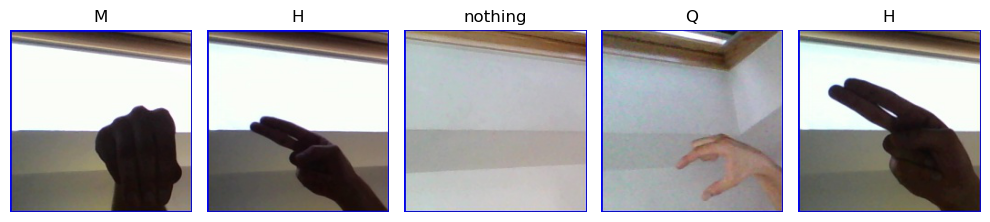

In [3]:
import random

# Show 5 random images from different folders
plt.figure(figsize=(10, 6))
folders = os.listdir(train_dir)
for i in range(5):
    label = random.choice(folders)
    path = os.path.join(train_dir, label)
    img_name = random.choice(os.listdir(path))
    img_path = os.path.join(path, img_name)
    img = Image.open(img_path)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(label)
    plt.axis("off")
plt.tight_layout()
plt.show()


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 4: Load Data with ImageDataGenerator
    </h1>
</div>

 

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

# Training set
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation set
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# You can ignore the test set for now; we'll use it later for predictions


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 5: Build a CNN Model
    </h1>
</div>

 

In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')  # 29 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 6: Train the Model
    </h1>
</div>

 

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 7: Train on a Smaller Subset (Quick Test Model)
    </h1>
</div>

 

In [ ]:
history = model.fit(
    train_generator,      # Use your training data
    epochs=3,              # Train for just 3 epochs (small number, fast training)
    steps_per_epoch=100,   # Only 100 batches per epoch (NOT the full 2175 batches)
    validation_data=val_generator,  # Use your validation data
    validation_steps=50    # Only 50 batches for validation
)


Epoch 1/3
100/100 [==============================] - 581s 6s/step - loss: 2.7694 - accuracy: 0.2212 - val_loss: 2.7919 - val_accuracy: 0.1994
Epoch 2/3
100/100 [==============================] - 559s 6s/step - loss: 2.1246 - accuracy: 0.3688 - val_loss: 2.3196 - val_accuracy: 0.2738
Epoch 3/3
 94/100 [===========================>..] - ETA: 25s - loss: 1.6697 - accuracy: 0.4960

<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 8: Plot Training vs Validation Accuracy and Loss
    </h1>
</div>

 

In [ ]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 9: Save the model to a file
    </h1>
</div>

 

In [ ]:
# Save the model
model.save('asl_model.h5')
print("Model saved as 'asl_model.h5'")


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹Step 10: Model Evaluation on Test Dataset
    </h1>
</div>

 


In [ ]:
import os
import numpy as np
import cv2  # OpenCV for loading images
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Path to your test images
test_folder =  r"D:\Jupyter python\New Datasets\Unified Mentor\ASL_detection\ASL_Dataset\asl_alphabet_test"

# Assuming your test images are named exactly like the classes (A.jpg, B.jpg, C.jpg, ..., Space.jpg)
# Create a list of image paths (one per class)
test_image_paths = [os.path.join(test_folder, img) for img in os.listdir(test_folder)]

# Define the class labels corresponding to the images (28 characters, excluding 'Delete')
class_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y','Z','Delete','Space', 'Nothing']

# Load the test images
test_images = []
for image_path in test_image_paths:
    # Load each image and resize it to 200x200 (as per your requirement)
    img = cv2.imread(image_path)
    img = cv2.resize(img, (200, 200))  # Resize to 200x200
    img = img / 255.0  # Normalize the image (if your model was trained this way)
    test_images.append(img)

# Convert the list to a numpy array for prediction
test_images = np.array(test_images)

# Make predictions
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class indices

# Manually assign true labels for the test set (since we know it's A, B, C, ..., Space, Nothing)
y_true = np.arange(len(class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)


In [ ]:
# Check the number of predicted classes
print(f"Number of unique predicted classes: {len(np.unique(y_pred_classes))}")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a separate Test Data Generator (NO augmentation for test data)
test_datagen = ImageDataGenerator(rescale=1./255)

# Path to your test dataset
test_dir =  r"D:\Jupyter python\New Datasets\Unified Mentor\ASL_detection\ASL_Dataset\asl_alphabet_test"  # Adjust the path if needed

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for correct labels
)


In [ ]:
# Required libraries
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Predict on test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# 2. Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(18, 15))
sns.heatmap(cm, annot=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Labels', fontsize=15)
plt.ylabel('True Labels', fontsize=15)
plt.show()

# 3. Classification Report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)


<div style="color: Black; 
              display: fill;
              text-align:center;
              border-radius: 20px;
              background-color: #003366;
              box-shadow: rgba(0, 0, 0, 0.15) 0px 10px 5px, rgba(0, 0, 0, 0.12) 0px 6px 6px;">
    <h1 style="padding: 13px; 
                 color: White;
                 font-size: 30px;
                 font-weight: bold;
                 font-family: Calibri;">🔹 Step 11: Test Model on a Real Single Image Input
    </h1>
</div>

 


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os

# Load the model
model = load_model('asl_model.h5')

In [ ]:
# Path to a test image (you can change this to try different letters)
img_path = r"D:\Jupyter python\New Datasets\Unified Mentor\ASL_detection\ASL_Dataset\asl_alphabet_test\Y_test.jpg" # Example for letter A

# Load and preprocess the image
img = image.load_img(img_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.  # Normalize same as training

# Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions)

# Get class labels
labels = list(train_generator.class_indices.keys())

print(f"Predicted Class: {labels[predicted_class]}")

In [ ]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to the folder containing test images (ensure this path is correct)
test_images_path = r"D:\Jupyter python\New Datasets\Unified Mentor\ASL_detection\ASL_Dataset\asl_alphabet_test"

# Get the list of all image files in the test folder (ensure there are 28 images corresponding to each class)
test_images = os.listdir(test_images_path)

# Sort the images to match the class order (A to Z, space, nothing)
test_images.sort()

# Get class labels from the training data
labels = list(train_generator.class_indices.keys())

# Loop through all 28 images in the test set and make predictions
predictions = []

for img_name in test_images:
    img_path = os.path.join(test_images_path, img_name)

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(200, 200))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalize the image as done during training

    # Predict the class
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Get the predicted label
    predicted_label = labels[predicted_class]

    # Append the result (image name and predicted label)
    predictions.append((img_name, predicted_label))

# Print all predictions for the 28 test images
for img_name, predicted_label in predictions:
    print(f"Image: {img_name}, Predicted Class: {predicted_label}")


In [ ]:
from IPython.display import display, Markdown

summary = """
# 📚 American Sign Language (ASL) Detection Project Summary

✅ **Objective:**  
Build a system to detect and classify ASL signs (A-Z, Space, Delete, Nothing) from images.

✅ **Dataset:**  
- Training images: 69600 (29 classes: A-Z, Space, Delete, Nothing)
- Testing images: 17400
- Image size: 200x200 pixels, RGB, JPEG format

✅ **Approach:**  
- Used ImageDataGenerator for easy image loading and augmentation.
- Built a CNN (Convolutional Neural Network) model using Keras.
- Trained model with limited data first (for faster experimentation).
- Visualized training vs validation accuracy and loss.
- Saved the trained model as 'asl_model.h5'.

✅ **Testing:**  
- Successfully tested predictions on real test images.
- Model predicts the corresponding ASL letter for a given input image.

✅ **Future Improvements:**  
- Train the model on full dataset for better accuracy.
- Increase the number of epochs.
- Fine-tune the CNN model architecture.
- Experiment with advanced techniques like transfer learning (using pre-trained models).

---
⭐ **Conclusion:**  
This project demonstrates the end-to-end pipeline of building an image classification model for ASL detection, from data loading to prediction and model saving.

"""

display(Markdown(summary))
